###  dplyr

In [ ]:
src_mysql(dbname, host = NULL)

In [105]:
library(dplyr)
head(select(diamonds, starts_with("c")), 2)
head(select(diamonds, ends_with("e")), 2)
head(select(diamonds, contains("p")), 2)
head(select(diamonds, matches(".p")), 2)
#select(d, matches("unit_[1-3]_score"))
#select(d, num_range("unit_", 1:3, "_score"))
diamonds %>% select(one_of(c("cut","price","garbage")))  %>%  head(5)
diamonds %>% select(cut,price,garbage)  %>%  head(5)

carat,cut,color,clarity
0.23,Ideal,E,SI2
0.21,Premium,E,SI1


table,price
55,326
61,326


depth,price
61.5,326
59.8,326


depth
61.5
59.8


Warning message:
“Unknown columns: `garbage`”

cut,price
Ideal,326
Premium,326
Good,327
Premium,334
Good,335


ERROR: Error in .f(.x[[i]], ...): object 'garbage' not found


In [36]:
filter(diamonds, (color == 'E' | clarity == 'SI2') & cut == 'Ideal' & table > 61)

carat,cut,color,clarity,depth,table,price,x,y,z
1.20,Ideal,J,SI2,59.1,62,4509,6.97,6.94,4.11
1.00,Ideal,E,SI1,60.1,62,5629,6.46,6.48,3.89
2.51,Ideal,I,SI2,58.4,62,18037,8.87,8.79,5.15
0.31,Ideal,E,VVS2,59.9,62,755,4.40,4.41,2.64
0.40,Ideal,E,VS1,59.2,62,1180,4.80,4.83,2.85
0.51,Ideal,E,SI2,58.3,62,1268,5.20,5.19,3.04
0.50,Ideal,E,SI1,59.7,62,1331,5.16,5.19,3.09


In [110]:
filter(diamonds, x %in% c(6.97, 5.2) & color == 'H' & cut == 'Very Good')


carat,cut,color,clarity,depth,table,price,x,y,z
1.27,Very Good,H,SI2,60.6,59,5715,6.97,7.00,4.23
1.26,Very Good,H,SI1,60.6,60,6546,6.97,7.00,4.23
1.30,Very Good,H,SI1,62.3,58,6758,6.97,7.03,4.36
1.19,Very Good,H,VS2,60.5,59,6781,6.97,7.00,4.17
1.30,Very Good,H,VS1,61.9,56,7747,6.97,7.05,4.34
0.50,Very Good,H,SI1,60.0,55,1148,5.20,5.23,3.13
0.53,Very Good,H,SI1,61.7,55,1189,5.20,5.24,3.22
0.54,Very Good,H,VVS1,62.0,57,1846,5.20,5.25,3.24


In [39]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [45]:
head(arrange(mtcars, cyl, desc(drat)))

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


grouped arrange ignores groups, unless you specifically ask

In [51]:
by_cyl <- mtcars %>% group_by(cyl)
head(by_cyl)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [52]:
head(by_cyl %>% arrange(desc(wt)))

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4


In [53]:
head(by_cyl %>% arrange(desc(wt), .by_group = TRUE))

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1


In [78]:
head(mutate(mtcars, displ_l13 = disp / 61.0237))

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,displ_l13
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,2.621932
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,2.621932
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,1.769804
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,4.227866
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,5.899347
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,3.687092


If you only want to keep the new variables, use `transmute()`

In [80]:
head(transmute(mtcars, displ_l12 = disp / 61.0237))

displ_l12
2.621932
2.621932
1.769804
4.227866
5.899347
3.687092


In [82]:
mtcars %>%
  summarise(mean = mean(disp), n = n()) 

mean,n
230.7219,32


In [83]:
mtcars %>%
  group_by(cyl) %>%
  summarise(mean = mean(disp), n = n())

cyl,mean,n
4,105.1364,11
6,183.3143,7
8,353.1000,14


In [127]:
## When passing a single vector, paste0 and paste work like as.character.
paste0(1:12)
paste(1:12)        # same
as.character(1:12) # same

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12"

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12"

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12"

In [130]:
## If you pass several vectors to paste0, they are concatenated in a
## vectorized way.
(nth <- paste0(1:12, c("st", "nd", "rd", rep("th", 9))))

[1] "1st"  "2nd"  "3rd"  "4th"  "5th"  "6th"  "7th"  "8th"  "9th"  "10th"
[11] "11th" "12th"

In [131]:
## paste works the same, but separates each input with a space.
## Notice that the recycling rules make every input as long as the longest input.
paste(month.abb, "is the", nth, "month of the year.")
paste(month.abb, letters)

[1] "Jan is the 1st month of the year."  "Feb is the 2nd month of the year." 
 [3] "Mar is the 3rd month of the year."  "Apr is the 4th month of the year." 
 [5] "May is the 5th month of the year."  "Jun is the 6th month of the year." 
 [7] "Jul is the 7th month of the year."  "Aug is the 8th month of the year." 
 [9] "Sep is the 9th month of the year."  "Oct is the 10th month of the year."
[11] "Nov is the 11th month of the year." "Dec is the 12th month of the year."

[1] "Jan a" "Feb b" "Mar c" "Apr d" "May e" "Jun f" "Jul g" "Aug h" "Sep i"
[10] "Oct j" "Nov k" "Dec l" "Jan m" "Feb n" "Mar o" "Apr p" "May q" "Jun r"
[19] "Jul s" "Aug t" "Sep u" "Oct v" "Nov w" "Dec x" "Jan y" "Feb z"

In [135]:
## You can change the separator by passing a sep argument
## which can be multiple characters.
paste(month.abb, "is the", nth, "month of the year.", sep = "(_._)(_._)")

[1] "Jan(_._)(_._)is the(_._)(_._)1st(_._)(_._)month of the year." 
 [2] "Feb(_._)(_._)is the(_._)(_._)2nd(_._)(_._)month of the year." 
 [3] "Mar(_._)(_._)is the(_._)(_._)3rd(_._)(_._)month of the year." 
 [4] "Apr(_._)(_._)is the(_._)(_._)4th(_._)(_._)month of the year." 
 [5] "May(_._)(_._)is the(_._)(_._)5th(_._)(_._)month of the year." 
 [6] "Jun(_._)(_._)is the(_._)(_._)6th(_._)(_._)month of the year." 
 [7] "Jul(_._)(_._)is the(_._)(_._)7th(_._)(_._)month of the year." 
 [8] "Aug(_._)(_._)is the(_._)(_._)8th(_._)(_._)month of the year." 
 [9] "Sep(_._)(_._)is the(_._)(_._)9th(_._)(_._)month of the year." 
[10] "Oct(_._)(_._)is the(_._)(_._)10th(_._)(_._)month of the year."
[11] "Nov(_._)(_._)is the(_._)(_._)11th(_._)(_._)month of the year."
[12] "Dec(_._)(_._)is the(_._)(_._)12th(_._)(_._)month of the year."

In [136]:
## To collapse the output into a single string, pass a collapse argument.
paste0(nth, collapse = ", ")

[1] "1st, 2nd, 3rd, 4th, 5th, 6th, 7th, 8th, 9th, 10th, 11th, 12th"

In [137]:
## For inputs of length 1, use the sep argument rather than collapse
paste("1st", "2nd", "3rd", collapse = ", ") # probably not what you wanted
paste("1st", "2nd", "3rd", sep = ", ")

[1] "1st 2nd 3rd"

[1] "1st, 2nd, 3rd"

In [138]:
## You can combine the sep and collapse arguments together.
paste(month.abb, nth, sep = ": ", collapse = "; ")

[1] "Jan: 1st; Feb: 2nd; Mar: 3rd; Apr: 4th; May: 5th; Jun: 6th; Jul: 7th; Aug: 8th; Sep: 9th; Oct: 10th; Nov: 11th; Dec: 12th"

[1] "Stopping distance of cars\n(ft) vs. speed (mph) from\nEzekiel (1930)"

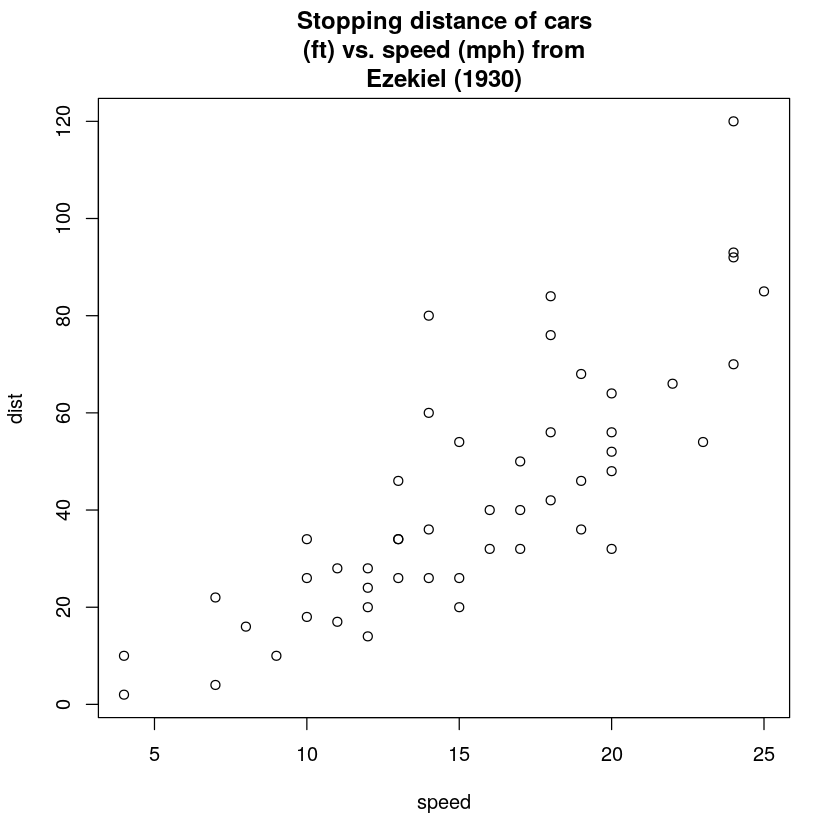

In [139]:
## Using paste() in combination with strwrap() can be useful
## for dealing with long strings.
(title <- paste(strwrap(
    "Stopping distance of cars (ft) vs. speed (mph) from Ezekiel (1930)",
    width = 30), collapse = "\n"))
plot(dist ~ speed, cars, main = title)